In [15]:
import pandas as pd
import csv
import numpy as np
from sklearn.metrics import classification_report

Explore data distribution

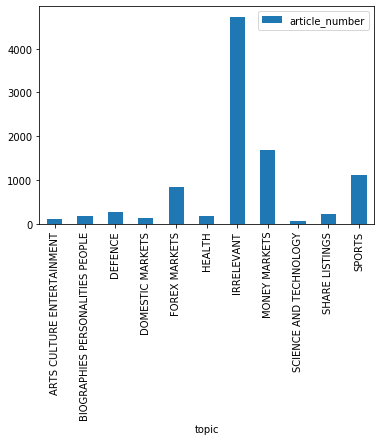

In [5]:
import matplotlib.pyplot as plt

df=pd.read_csv('training.csv')

df_graph = df[['topic','article_number']]
df_graph.groupby('topic').count().plot.bar(ylim=0)

plt.show()

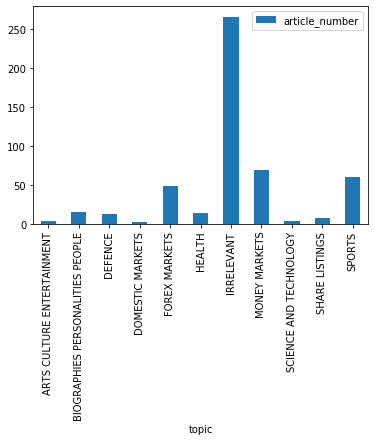

In [6]:
df_test=pd.read_csv('test.csv')

df_graph_test = df_test[['topic','article_number']]
df_graph_test.groupby('topic').count().plot.bar(ylim=0)

plt.show()

Transforming training set words to features with TF-IDF values

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

#give each word a tf-idf value
train_features = vectorizer.fit_transform(df['article_words'])

print(train_features.shape)

y_train = df['topic']


(9500, 35822)


Transforming test set words to features with TF-IDF values

In [9]:


#give each word a tf-idf value
test_features = vectorizer.transform(df_test['article_words'])

print(test_features.shape)

y_test = df_test['topic']


(500, 35822)


Run ML algos

Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

LGR_clf = LogisticRegression(random_state=0)
LGR_clf.fit(train_features, y_train)

LGR_prediction_test = LGR_clf.predict(test_features)
print('test data accuracy: {}'.format(np.mean(LGR_prediction_test == y_test)))

LGR_prediction_train = LGR_clf.predict(train_features)
print('train data accuracy: {}'.format(np.mean(LGR_prediction_train == y_train)))

print(classification_report(y_test, LGR_prediction_test, target_names=target_names))

                                  precision    recall  f1-score   support

      ARTS CULTURE ENTERTAINMENT       0.00      0.00      0.00         3
BIOGRAPHIES PERSONALITIES PEOPLE       0.00      0.00      0.00        15
                         DEFENCE       1.00      0.46      0.63        13
                DOMESTIC MARKETS       0.00      0.00      0.00         2
                   FOREX MARKETS       0.48      0.31      0.38        48
                          HEALTH       0.50      0.07      0.12        14
                      IRRELEVANT       0.79      0.93      0.85       266
                   MONEY MARKETS       0.54      0.65      0.59        69
          SCIENCE AND TECHNOLOGY       0.00      0.00      0.00         3
                  SHARE LISTINGS       0.50      0.14      0.22         7
                          SPORTS       0.94      0.97      0.95        60

                        accuracy                           0.75       500
                       macro avg    

C:\Users\jingj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Naive Bayes Rule

In [16]:
from sklearn.naive_bayes import MultinomialNB
NBclf = MultinomialNB()

NBclf.fit(train_features, y_train)

NBpredictions_test = NBclf.predict(test_features)

print('test data accuracy: {}'.format(np.mean(NBpredictions_test == y_test)))

NBpredictions_train = NBclf.predict(train_features)

print('train data accuracy: {}'.format(np.mean(NBpredictions_train == y_train)))

print(classification_report(y_test, NBpredictions_test, target_names=target_names))


test data accuracy: 0.68
train data accuracy: 0.6817894736842105
                                  precision    recall  f1-score   support

      ARTS CULTURE ENTERTAINMENT       0.00      0.00      0.00         3
BIOGRAPHIES PERSONALITIES PEOPLE       0.00      0.00      0.00        15
                         DEFENCE       0.00      0.00      0.00        13
                DOMESTIC MARKETS       0.00      0.00      0.00         2
                   FOREX MARKETS       0.00      0.00      0.00        48
                          HEALTH       0.00      0.00      0.00        14
                      IRRELEVANT       0.67      0.97      0.79       266
                   MONEY MARKETS       0.55      0.52      0.54        69
          SCIENCE AND TECHNOLOGY       0.00      0.00      0.00         3
                  SHARE LISTINGS       0.00      0.00      0.00         7
                          SPORTS       0.94      0.75      0.83        60

                        accuracy             

C:\Users\jingj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier(n_estimators=10)


RFclf.fit(train_features, y_train)

RFpredictions_test = RFclf.predict(test_features)

print('test data accuracy: {}'.format(np.mean(RFpredictions_test == y_test)))

RFpredictions_train = RFclf.predict(train_features)

print('train data accuracy: {}'.format(np.mean(RFpredictions_train == y_train)))


RFclf1 = RandomForestClassifier(n_estimators=100)
RFclf1.fit(train_features, y_train)


RFpredictions1_test = RFclf1.predict(test_features)
print('test data accuracy: {}'.format(np.mean(RFpredictions1_test == y_test)))

RFpredictions1_train = RFclf1.predict(train_features)
print('train data accuracy: {}'.format(np.mean(RFpredictions1_train == y_train)))

print(classification_report(y_test, RFpredictions1_test, target_names=target_names))



test data accuracy: 0.712
train data accuracy: 0.9782105263157894
test data accuracy: 0.74
train data accuracy: 0.9889473684210527
                                  precision    recall  f1-score   support

      ARTS CULTURE ENTERTAINMENT       1.00      0.33      0.50         3
BIOGRAPHIES PERSONALITIES PEOPLE       0.00      0.00      0.00        15
                         DEFENCE       1.00      0.23      0.38        13
                DOMESTIC MARKETS       0.00      0.00      0.00         2
                   FOREX MARKETS       0.56      0.19      0.28        48
                          HEALTH       0.00      0.00      0.00        14
                      IRRELEVANT       0.76      0.94      0.84       266
                   MONEY MARKETS       0.57      0.74      0.64        69
          SCIENCE AND TECHNOLOGY       0.00      0.00      0.00         3
                  SHARE LISTINGS       0.00      0.00      0.00         7
                          SPORTS       0.92      0.92 

C:\Users\jingj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVM

In [18]:
from sklearn.svm import SVC

SVM_clf = SVC(kernel='linear')
SVM_clf.fit(train_features, y_train)


SVMpredictions_test = SVM_clf.predict(test_features)
print('test data accuracy: {}'.format(np.mean(SVMpredictions_test == y_test)))
      
SVMpredictions_train = SVM_clf.predict(train_features)
print('train data accuracy: {}'.format(np.mean(SVMpredictions_train == y_train)))


print(classification_report(y_test, SVMpredictions_test, target_names=target_names))


test data accuracy: 0.768
train data accuracy: 0.8988421052631579
                                  precision    recall  f1-score   support

      ARTS CULTURE ENTERTAINMENT       0.40      0.67      0.50         3
BIOGRAPHIES PERSONALITIES PEOPLE       1.00      0.27      0.42        15
                         DEFENCE       0.78      0.54      0.64        13
                DOMESTIC MARKETS       0.00      0.00      0.00         2
                   FOREX MARKETS       0.42      0.33      0.37        48
                          HEALTH       0.73      0.79      0.76        14
                      IRRELEVANT       0.86      0.89      0.88       266
                   MONEY MARKETS       0.53      0.67      0.59        69
          SCIENCE AND TECHNOLOGY       0.00      0.00      0.00         3
                  SHARE LISTINGS       0.60      0.43      0.50         7
                          SPORTS       0.95      0.97      0.96        60

                        accuracy            

C:\Users\jingj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
